In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

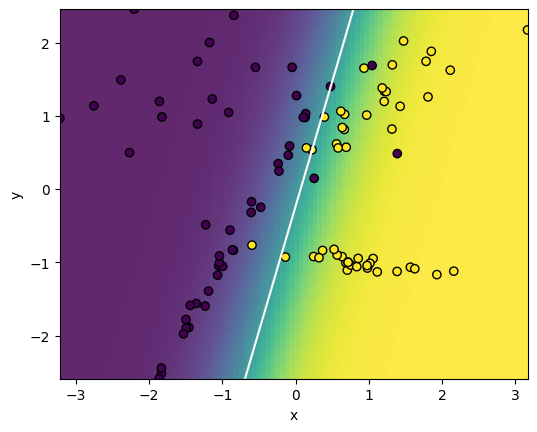

In [93]:
np.random.seed(420)

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2
)

x_min, x_max = X[:, 0].min(axis=0), X[:, 0].max(axis=0)
y_min, y_max = X[:, 1].min(axis=0), X[:, 1].max(axis=0) 
n = 100

xx = np.linspace(x_min, x_max, n)
yy = np.linspace(y_min, y_max, n).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

model = LogisticRegression().fit(X, y)
probs = model.predict_proba(Xfull)

plt.imshow(probs[:, 1].reshape((n, n)), extent=(x_min, x_max, y_min, y_max), origin="lower", cmap="viridis", alpha=0.85)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
plt.contour(xx, yy, probs[:, 1].reshape(xx.shape), levels=[.5], colors="white")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('../figures/lr_plot.png')
plt.show()

 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.67it/s]

Loss:  0.722307271361351
Loss:  0.7140524727106095
Loss:  0.7079782003164291
Loss:  0.703295596241951
Loss:  0.700280808210373
Loss:  0.6981821739673615
Loss:  0.6966829442977905



 22%|██████████████████▋                                                                | 9/40 [00:00<00:01, 29.09it/s]

Loss:  0.695423754453659
Loss:  0.6943292641639709
Loss:  0.6933915621042251


 38%|██████████████████████████████▊                                                   | 15/40 [00:01<00:02, 10.72it/s]

Loss:  0.6925701308250427
Loss:  0.6917813110351563
Loss:  0.6910167068243027
Loss:  0.6902527016401291
Loss:  0.6894528329372406
Loss:  0.6885997611284256



 45%|████████████████████████████████████▉                                             | 18/40 [00:01<00:01, 13.59it/s]

Loss:  0.6876774060726166
Loss:  0.6866704571247101
Loss:  0.6855498003959656
Loss:  0.6842981791496277


 60%|█████████████████████████████████████████████████▏                                | 24/40 [00:02<00:01,  9.51it/s]

Loss:  0.6828884321451187
Loss:  0.6812588429450989
Loss:  0.6792585158348083
Loss:  0.6769265240430832
Loss:  0.674337877035141
Loss:  0.6714741230010987



 68%|███████████████████████████████████████████████████████▎                          | 27/40 [00:02<00:01, 12.01it/s]

Loss:  0.6683017128705978
Loss:  0.6639423704147339
Loss:  0.6572022992372513
Loss:  0.6477087277173996


 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [00:03<00:00,  9.13it/s]

Loss:  0.6350982058048248
Loss:  0.6169371482729912
Loss:  0.5864204397797584
Loss:  0.5531904453039169
Loss:  0.5210119824111462
Loss:  0.4946215707063675


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 39/40 [00:03<00:00, 14.11it/s]

Loss:  0.4722513706982136
Loss:  0.45195697151124475
Loss:  0.4328393517434597
Loss:  0.41462262682616713


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.47it/s]


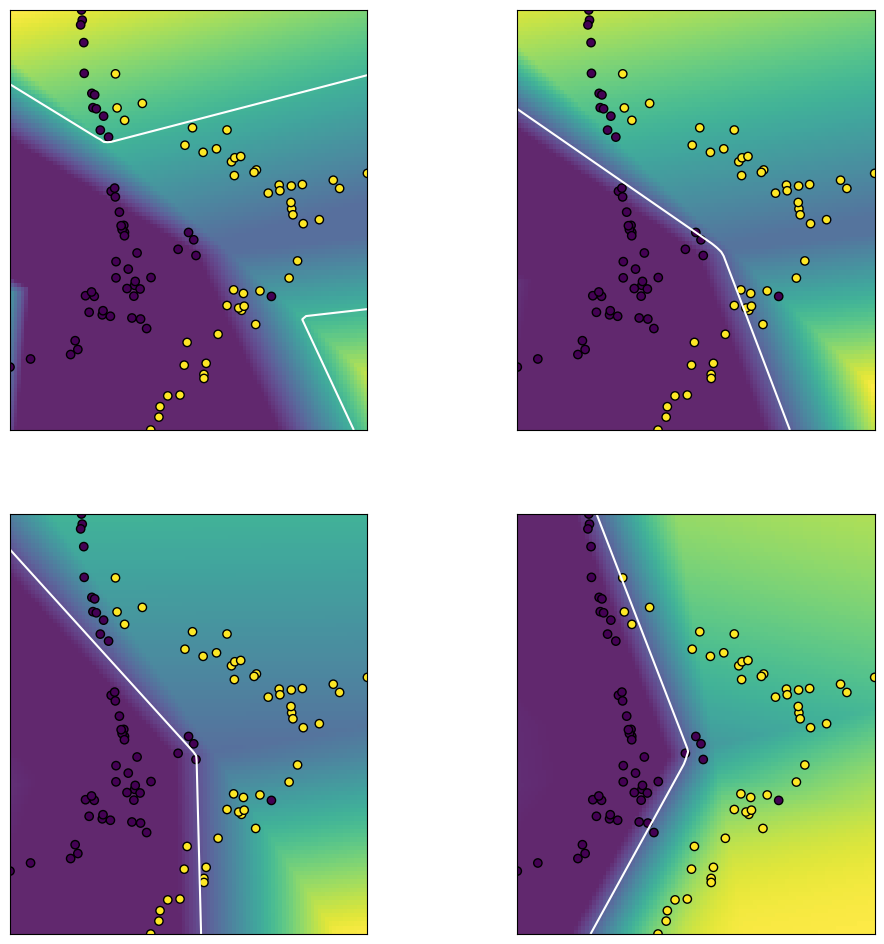

In [226]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

np.random.seed(500)
torch.manual_seed(12)

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2
)


class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(in_features=2, out_features=3)
        self.lin2 = nn.Linear(in_features=3, out_features=2)
        self.lin3 = nn.Linear(in_features=2, out_features=1)
        torch.nn.init.normal_(self.lin1.weight)
        torch.nn.init.normal_(self.lin2.weight)
        torch.nn.init.normal_(self.lin3.weight)
    
    def forward(self, x):
        out = self.lin1(x)
        out = F.relu(out)
        out = self.lin2(out)
        out = F.relu(out)
        out = self.lin3(out)
        return out
    
    def train_and_plot(self, X, y):
        x_min, x_max = X[:, 0].min(axis=0), X[:, 0].max(axis=0)
        y_min, y_max = X[:, 1].min(axis=0), X[:, 1].max(axis=0) 
        n = 100
        xx = np.linspace(x_min, x_max, n)
        yy = np.linspace(y_min, y_max, n).T
        xx, yy = np.meshgrid(xx, yy)
        Xfull = np.c_[xx.ravel(), yy.ravel()]
        
        xaxis, yaxis = 2, 2
        fig, axs = plt.subplots(xaxis, yaxis, figsize=(6*xaxis, 6*yaxis))
        axs = axs.reshape(-1)
        step = 0
        
        X, y = torch.from_numpy(X).float(), torch.from_numpy(y).float()
        
        optimizer = torch.optim.SGD(self.parameters(), lr=5e-3)
        for j in tqdm(range(40)):
            losses = 0
            for i in range(X.shape[0]):
                out = self.forward(X[i].reshape(-1, 2))
                loss = F.binary_cross_entropy_with_logits(out, y[i].reshape(-1, 1))
                loss.backward()
                losses += loss.detach().cpu().item()
                optimizer.step()
                model.zero_grad()
            print("Loss: ",losses/X.shape[0])
            
            if (j+1) % 10 == 0:
                preds = []
                for i in range(Xfull.shape[0]):
                    with torch.no_grad():
                        out = self.forward(torch.tensor(Xfull[i]).float().reshape(-1, 2))
                        preds.append(torch.sigmoid(out).cpu().detach().numpy()[0])
                preds = np.array(preds)

                axs[step].set_xticks([])
                axs[step].set_yticks([])
                
                axs[step].imshow(
                    preds.reshape((n, n)), 
                    extent=(x_min, x_max, y_min, y_max), 
                    origin="lower", 
                    cmap="viridis", 
                    alpha=0.85
                )
                axs[step].scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
                axs[step].contour(xx, yy, preds.reshape(xx.shape), levels=[.5], colors="white")
                step = step + 1
                
        plt.savefig("../figures/dl_demo.png")
        plt.show()

model = SimpleModel()
model.train_and_plot(X, y)